In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")
from yellowbrick.cluster import KElbowVisualizer


In [2]:
airline_data = pd.read_csv('airline_review.csv')
airline_data.tail()

,Unnamed: 0,rating,header,author,date,place,content,aircraft,traveller_type,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,recommended,entertainment,trip_verified
3611,3649,2,British Airways customer review,G Pardoe,2014-05-03,United Kingdom,Las Vegas-LGW 777 3 class. Business. The uniqu...,NaN,NaN,Economy Class,NaN,NaN,5,5,5,-1,4,yes,-1,NaN
3612,3650,8,British Airways customer review,Guy Senior,2014-04-30,United Kingdom,An interesting contrast on recent Gatwick to T...,NaN,NaN,Economy Class,NaN,NaN,3,3,3,-1,3,no,4,NaN
3613,3651,8,British Airways customer review,Jack Hughes,2012-08-30,United Kingdom,Heathrow Marrakech. Had previously travelled o...,NaN,NaN,Business Class,NaN,NaN,4,3,2,-1,2,no,3,NaN
3614,3652,6,British Airways customer review,W Benson,2012-08-29,United Kingdom,HKG-LHR in New Club World on Boeing 777-300 - ...,NaN,NaN,Economy Class,NaN,NaN,3,1,2,-1,3,no,-1,NaN
3615,3653,8,British Airways customer review,Michael Dielissen,2012-08-29,Canada,YYZ to LHR - July 2012 - I flew overnight in p...,NaN,NaN,Economy Class,NaN,NaN,2,3,2,-1,3,no,3,NaN


In [3]:
# Checking for missing values in each column
missing_values = airline_data.isnull().sum()
missing_values


Unnamed: 0                0
rating                    0
header                    0
author                    0
date                      0
place                     0
content                   0
aircraft               1714
traveller_type          721
seat_type                 2
route                   725
date_flown              728
seat_comfort              0
cabin_staff_service       0
food_beverages            0
ground_service            0
value_for_money           0
recommended               0
entertainment             0
trip_verified          1474
dtype: int64

In [4]:
# Identifying columns that might not be useful for numerical analysis (usually lengthy text columns)
potential_columns_to_drop = ['content']

# Checking the types of each column to identify any other columns that may need transformation or removal
column_types = airline_data.dtypes



In [5]:
potential_columns_to_drop


['content']

In [6]:
column_types

Unnamed: 0              int64
rating                  int64
header                 object
author                 object
date                   object
place                  object
content                object
aircraft               object
traveller_type         object
seat_type              object
route                  object
date_flown             object
seat_comfort            int64
cabin_staff_service     int64
food_beverages          int64
ground_service          int64
value_for_money         int64
recommended            object
entertainment           int64
trip_verified          object
dtype: object

In [7]:
# Dropping the 'content' column
airline_data_cleaned = airline_data.drop(columns=['content'])

# Converting 'date' and 'date_flown' to datetime format
airline_data_cleaned['date'] = pd.to_datetime(airline_data_cleaned['date'])
airline_data_cleaned['date_flown'] = pd.to_datetime(airline_data_cleaned['date_flown'])



In [8]:
airline_data_cleaned

,Unnamed: 0,rating,header,author,date,place,aircraft,traveller_type,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,recommended,entertainment,trip_verified
0,0,2,service was mediocre at best,Gary Storer,2023-10-03,United Kingdom,A380,Couple Leisure,Economy Class,Chicago to Manchester via Heathrow,2023-10-01,2,3,1,2,2,no,-1,Not Verified
1,1,2,BA standards continue to decline,A Jensen,2023-10-02,United Kingdom,A320,Business,Business Class,London Heathrow to Munich,2023-09-01,2,1,2,1,1,no,-1,Verified
2,2,2,"won the race to the bottom""",John Rockett,2023-10-02,United Kingdom,A320,Couple Leisure,Business Class,Heathrow to Istanbul,2023-09-01,2,3,2,1,1,no,-1,Not Verified
3,3,3,Not a reliable airline,Tatiana Bobrovskaya,2023-10-02,United Kingdom,A320,Business,Economy Class,London to Geneva,2023-10-01,4,4,2,1,1,no,-1,Verified
4,4,1,It is a national disgrace,A Dawson,2023-09-30,United Kingdom,NaN,Couple Leisure,Business Class,Athens to London,2023-09-01,1,1,1,1,1,no,1,Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3611,3649,2,British Airways customer review,G Pardoe,2014-05-03,United Kingdom,NaN,NaN,Economy Class,NaN,NaT,5,5,5,-1,4,yes,-1,NaN
3612,3650,8,British Airways customer review,Guy Senior,2014-04-30,United Kingdom,NaN,NaN,Economy Class,NaN,NaT,3,3,3,-1,3,no,4,NaN
3613,3651,8,British Airways customer review,Jack Hughes,2012-08-30,United Kingdom,NaN,NaN,Business Class,NaN,NaT,4,3,2,-1,2,no,3,NaN
3614,3652,6,British Airways customer review,W Benson,2012-08-29,United Kingdom,NaN,NaN,Economy Class,NaN,NaT,3,1,2,-1,3,no,-1,NaN


In [9]:
# Handling missing values: 
# For categorical columns like 'aircraft', 'traveller_type', 'route', and 'trip_verified', 
# we can replace missing values with a placeholder like 'Unknown'.
# This allows us to retain the data without imputing potentially misleading information.
categorical_columns_with_missing_values = ['aircraft', 'traveller_type', 'route', 'trip_verified']
for column in categorical_columns_with_missing_values:
    airline_data_cleaned[column].fillna('Unknown', inplace=True)

# Displaying the updated dataset to verify the changes
airline_data_cleaned.head()

,Unnamed: 0,rating,header,author,date,place,aircraft,traveller_type,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,recommended,entertainment,trip_verified
0,0,2,service was mediocre at best,Gary Storer,2023-10-03,United Kingdom,A380,Couple Leisure,Economy Class,Chicago to Manchester via Heathrow,2023-10-01,2,3,1,2,2,no,-1,Not Verified
1,1,2,BA standards continue to decline,A Jensen,2023-10-02,United Kingdom,A320,Business,Business Class,London Heathrow to Munich,2023-09-01,2,1,2,1,1,no,-1,Verified
2,2,2,"won the race to the bottom""",John Rockett,2023-10-02,United Kingdom,A320,Couple Leisure,Business Class,Heathrow to Istanbul,2023-09-01,2,3,2,1,1,no,-1,Not Verified
3,3,3,Not a reliable airline,Tatiana Bobrovskaya,2023-10-02,United Kingdom,A320,Business,Economy Class,London to Geneva,2023-10-01,4,4,2,1,1,no,-1,Verified
4,4,1,It is a national disgrace,A Dawson,2023-09-30,United Kingdom,Unknown,Couple Leisure,Business Class,Athens to London,2023-09-01,1,1,1,1,1,no,1,Verified


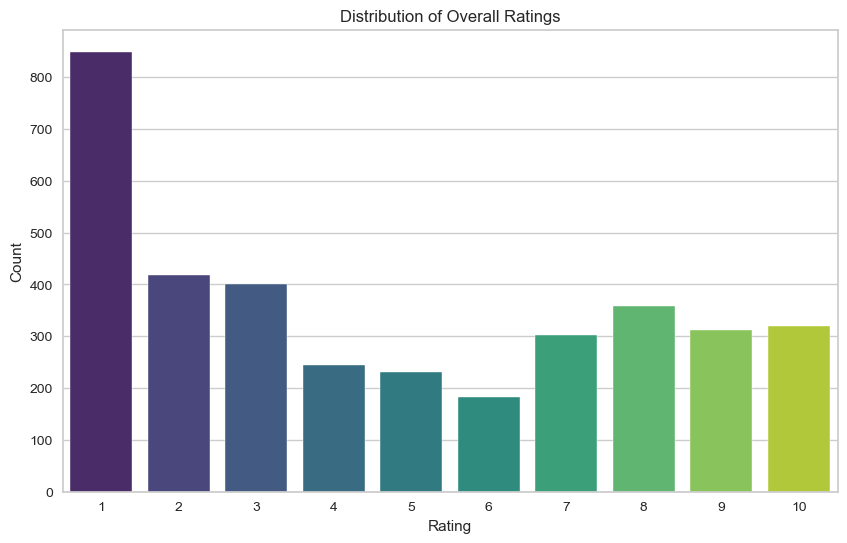

In [10]:
# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=airline_data_cleaned, palette='viridis')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('rating_distribution.png')
plt.show()

In [11]:
# Creating a column for the month and year of the review
airline_data_cleaned['month_year'] = airline_data_cleaned['date'].dt.to_period('M')



In [12]:
airline_data_cleaned

,Unnamed: 0,rating,header,author,date,place,aircraft,traveller_type,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,recommended,entertainment,trip_verified,month_year
0,0,2,service was mediocre at best,Gary Storer,2023-10-03,United Kingdom,A380,Couple Leisure,Economy Class,Chicago to Manchester via Heathrow,2023-10-01,2,3,1,2,2,no,-1,Not Verified,2023-10
1,1,2,BA standards continue to decline,A Jensen,2023-10-02,United Kingdom,A320,Business,Business Class,London Heathrow to Munich,2023-09-01,2,1,2,1,1,no,-1,Verified,2023-10
2,2,2,"won the race to the bottom""",John Rockett,2023-10-02,United Kingdom,A320,Couple Leisure,Business Class,Heathrow to Istanbul,2023-09-01,2,3,2,1,1,no,-1,Not Verified,2023-10
3,3,3,Not a reliable airline,Tatiana Bobrovskaya,2023-10-02,United Kingdom,A320,Business,Economy Class,London to Geneva,2023-10-01,4,4,2,1,1,no,-1,Verified,2023-10
4,4,1,It is a national disgrace,A Dawson,2023-09-30,United Kingdom,Unknown,Couple Leisure,Business Class,Athens to London,2023-09-01,1,1,1,1,1,no,1,Verified,2023-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3611,3649,2,British Airways customer review,G Pardoe,2014-05-03,United Kingdom,Unknown,Unknown,Economy Class,Unknown,NaT,5,5,5,-1,4,yes,-1,Unknown,2014-05
3612,3650,8,British Airways customer review,Guy Senior,2014-04-30,United Kingdom,Unknown,Unknown,Economy Class,Unknown,NaT,3,3,3,-1,3,no,4,Unknown,2014-04
3613,3651,8,British Airways customer review,Jack Hughes,2012-08-30,United Kingdom,Unknown,Unknown,Business Class,Unknown,NaT,4,3,2,-1,2,no,3,Unknown,2012-08
3614,3652,6,British Airways customer review,W Benson,2012-08-29,United Kingdom,Unknown,Unknown,Economy Class,Unknown,NaT,3,1,2,-1,3,no,-1,Unknown,2012-08


In [13]:
# Calculating average rating per month
average_ratings_over_time = airline_data_cleaned.groupby('month_year')['rating'].mean().reset_index()



In [14]:
average_ratings_over_time

,month_year,rating
0,2012-08,7.333333
1,2014-04,8.000000
2,2014-05,5.877551
3,2014-06,6.081081
4,2014-07,6.537037
...,...,...
110,2023-06,2.437500
111,2023-07,3.153846
112,2023-08,3.142857
113,2023-09,2.269231


In [15]:
# Converting 'month_year' back to datetime for plotting
average_ratings_over_time['month_year'] = average_ratings_over_time['month_year'].dt.to_timestamp()



In [16]:
average_ratings_over_time.head(20)

,month_year,rating
0,2012-08-01,7.333333
1,2014-04-01,8.000000
2,2014-05-01,5.877551
3,2014-06-01,6.081081
4,2014-07-01,6.537037
5,2014-08-01,6.205128
6,2014-09-01,5.531250
7,2014-10-01,5.306667
8,2014-11-01,5.824561
9,2014-12-01,6.152174


In [17]:
average_ratings_over_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   month_year  115 non-null    datetime64[ns]
 1   rating      115 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.9 KB


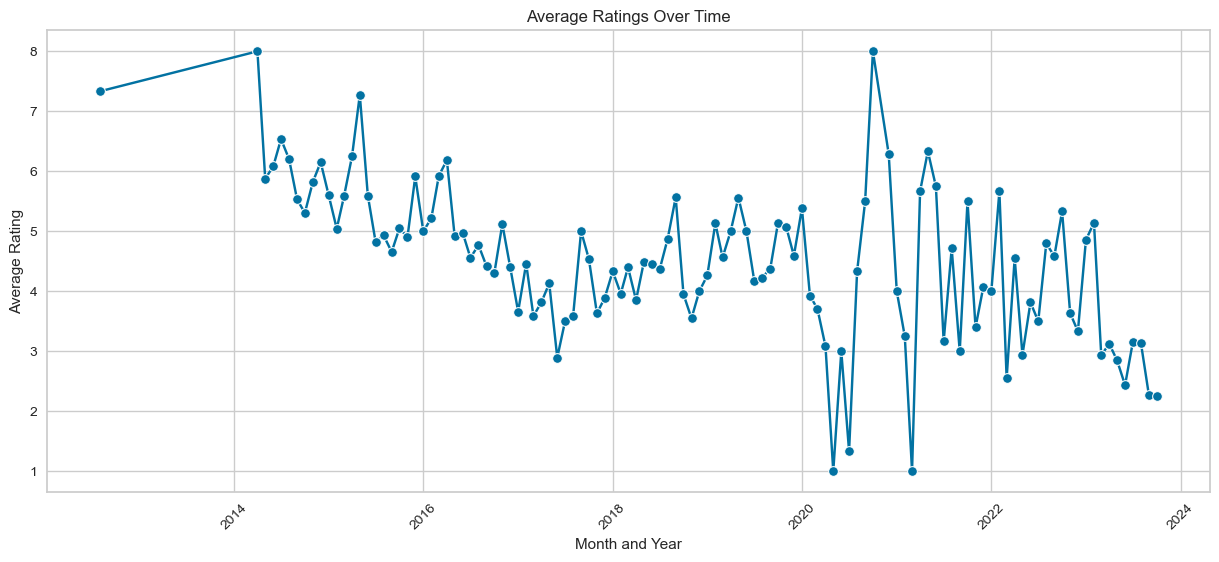

In [18]:
# Plotting Ratings Over Time
plt.figure(figsize=(15, 6))
sns.lineplot(x='month_year', y='rating', data=average_ratings_over_time, marker='o', color='b')
plt.title('Average Ratings Over Time')
plt.xlabel('Month and Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.savefig('average_ratings_over_time.png')
plt.show()

In [19]:
airline_data_cleaned.head()

,Unnamed: 0,rating,header,author,date,place,aircraft,traveller_type,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,recommended,entertainment,trip_verified,month_year
0,0,2,service was mediocre at best,Gary Storer,2023-10-03,United Kingdom,A380,Couple Leisure,Economy Class,Chicago to Manchester via Heathrow,2023-10-01,2,3,1,2,2,no,-1,Not Verified,2023-10
1,1,2,BA standards continue to decline,A Jensen,2023-10-02,United Kingdom,A320,Business,Business Class,London Heathrow to Munich,2023-09-01,2,1,2,1,1,no,-1,Verified,2023-10
2,2,2,"won the race to the bottom""",John Rockett,2023-10-02,United Kingdom,A320,Couple Leisure,Business Class,Heathrow to Istanbul,2023-09-01,2,3,2,1,1,no,-1,Not Verified,2023-10
3,3,3,Not a reliable airline,Tatiana Bobrovskaya,2023-10-02,United Kingdom,A320,Business,Economy Class,London to Geneva,2023-10-01,4,4,2,1,1,no,-1,Verified,2023-10
4,4,1,It is a national disgrace,A Dawson,2023-09-30,United Kingdom,Unknown,Couple Leisure,Business Class,Athens to London,2023-09-01,1,1,1,1,1,no,1,Verified,2023-09


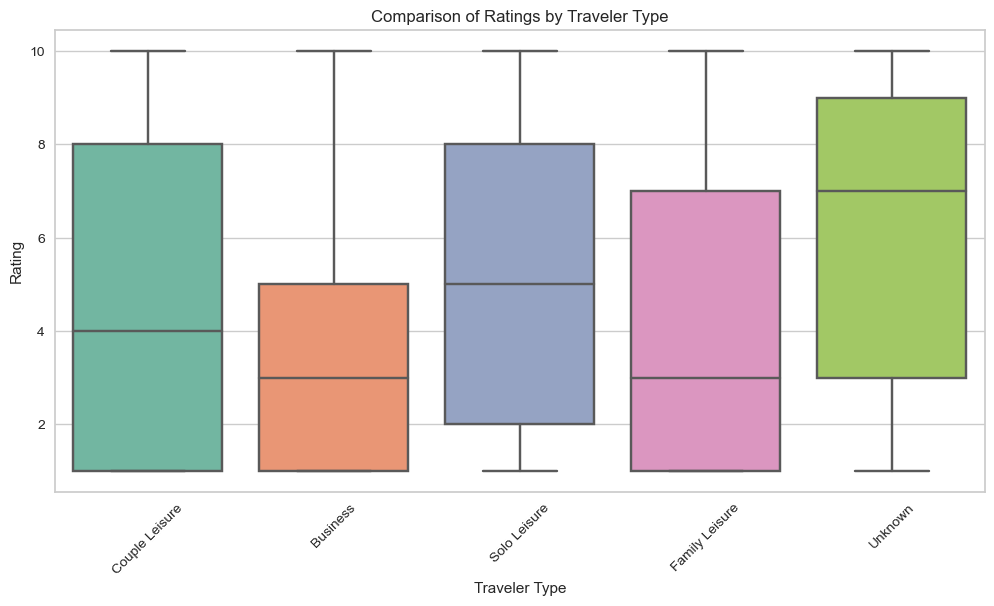

In [20]:
# Comparison of Ratings by Traveler Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='traveller_type', y='rating', data=airline_data_cleaned, palette='Set2')
plt.title('Comparison of Ratings by Traveler Type')
plt.xlabel('Traveler Type')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.savefig('comparison_of_ratings_by_traveler_type.png')
plt.show()


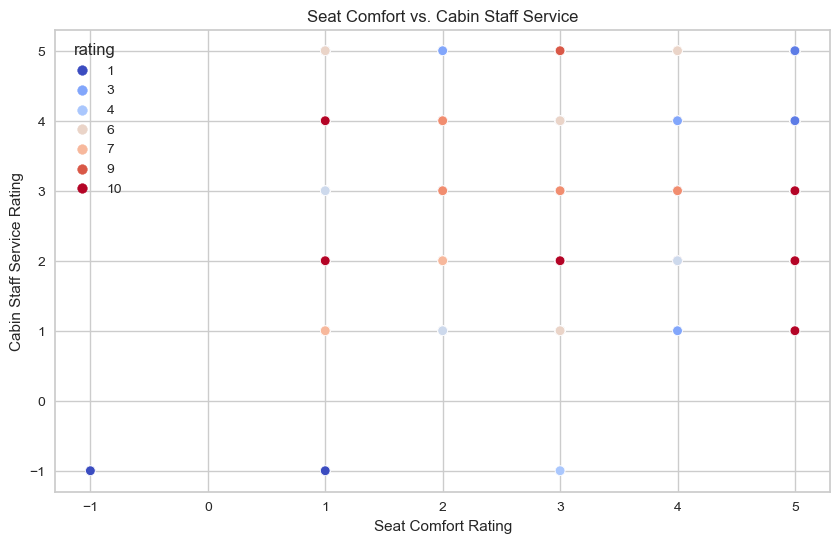

In [21]:
# Scatter plot for Seat Comfort vs. Cabin Staff Service
plt.figure(figsize=(10, 6))
sns.scatterplot(x='seat_comfort', y='cabin_staff_service', data=airline_data_cleaned, hue='rating', palette='coolwarm')
plt.title('Seat Comfort vs. Cabin Staff Service')
plt.xlabel('Seat Comfort Rating')
plt.ylabel('Cabin Staff Service Rating')
plt.savefig('seat_comfort_vs_cabin_staff_service.png')
plt.show()

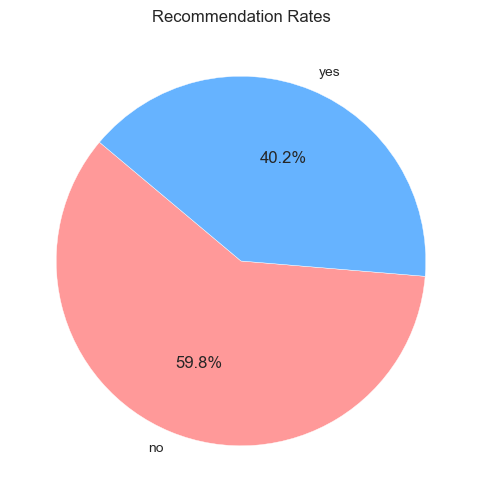

In [22]:
# Proportion of flights recommended vs not recommended
recommendation_counts = airline_data_cleaned['recommended'].value_counts()

plt.figure(figsize=(8, 6))
recommendation_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Recommendation Rates')
plt.ylabel('')
plt.savefig('recommendation_rates.png')
plt.show()

In [23]:
# Filtering out 'Unknown' aircraft types for a clearer analysis
aircraft_ratings = airline_data_cleaned[airline_data_cleaned['aircraft'] != 'Unknown']



In [24]:
aircraft_ratings.head()

,Unnamed: 0,rating,header,author,date,place,aircraft,traveller_type,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,recommended,entertainment,trip_verified,month_year
0,0,2,service was mediocre at best,Gary Storer,2023-10-03,United Kingdom,A380,Couple Leisure,Economy Class,Chicago to Manchester via Heathrow,2023-10-01,2,3,1,2,2,no,-1,Not Verified,2023-10
1,1,2,BA standards continue to decline,A Jensen,2023-10-02,United Kingdom,A320,Business,Business Class,London Heathrow to Munich,2023-09-01,2,1,2,1,1,no,-1,Verified,2023-10
2,2,2,"won the race to the bottom""",John Rockett,2023-10-02,United Kingdom,A320,Couple Leisure,Business Class,Heathrow to Istanbul,2023-09-01,2,3,2,1,1,no,-1,Not Verified,2023-10
3,3,3,Not a reliable airline,Tatiana Bobrovskaya,2023-10-02,United Kingdom,A320,Business,Economy Class,London to Geneva,2023-10-01,4,4,2,1,1,no,-1,Verified,2023-10
6,6,4,Very disappointed,Tom Slowbe,2023-09-28,United States,777-300 and A320,Couple Leisure,First Class,Dallas to Dubrovnik via Heathrow,2023-09-01,1,4,4,3,2,no,3,Verified,2023-09


In [25]:
# Calculating average rating for each aircraft type
average_ratings_by_aircraft = aircraft_ratings.groupby('aircraft')['rating'].mean().sort_values(ascending=False).reset_index()
# Identifying the top 5 and bottom 5 rated aircraft types
top_5_aircraft = average_ratings_by_aircraft.head(5)
bottom_5_aircraft = average_ratings_by_aircraft.tail(5)

# Inverting the ratings of the bottom 5 for downward bars
bottom_5_aircraft['rating'] = -bottom_5_aircraft['rating']

# Combining the top 5 and bottom 5
combined_aircraft = pd.concat([top_5_aircraft, bottom_5_aircraft])


In [26]:
average_ratings_by_aircraft

,aircraft,rating
0,Boeing 777-236 ER,10.0
1,Boeing 747 and Boeing 777,10.0
2,A319 / Boeing 787-9,10.0
3,"A320, Boeing 777",10.0
4,A319 / Boeing 777-300,10.0
...,...,...
195,A322,1.0
196,A380 / A320,1.0
197,Dreamliner,1.0
198,Boieng 777-200,1.0


In [27]:
top_5_aircraft

,aircraft,rating
0,Boeing 777-236 ER,10.0
1,Boeing 747 and Boeing 777,10.0
2,A319 / Boeing 787-9,10.0
3,"A320, Boeing 777",10.0
4,A319 / Boeing 777-300,10.0


In [28]:
bottom_5_aircraft

,aircraft,rating
195,A322,-1.0
196,A380 / A320,-1.0
197,Dreamliner,-1.0
198,Boieng 777-200,-1.0
199,A319 / Boeing 789,-1.0


In [29]:
combined_aircraft

,aircraft,rating
0,Boeing 777-236 ER,10.0
1,Boeing 747 and Boeing 777,10.0
2,A319 / Boeing 787-9,10.0
3,"A320, Boeing 777",10.0
4,A319 / Boeing 777-300,10.0
195,A322,-1.0
196,A380 / A320,-1.0
197,Dreamliner,-1.0
198,Boieng 777-200,-1.0
199,A319 / Boeing 789,-1.0


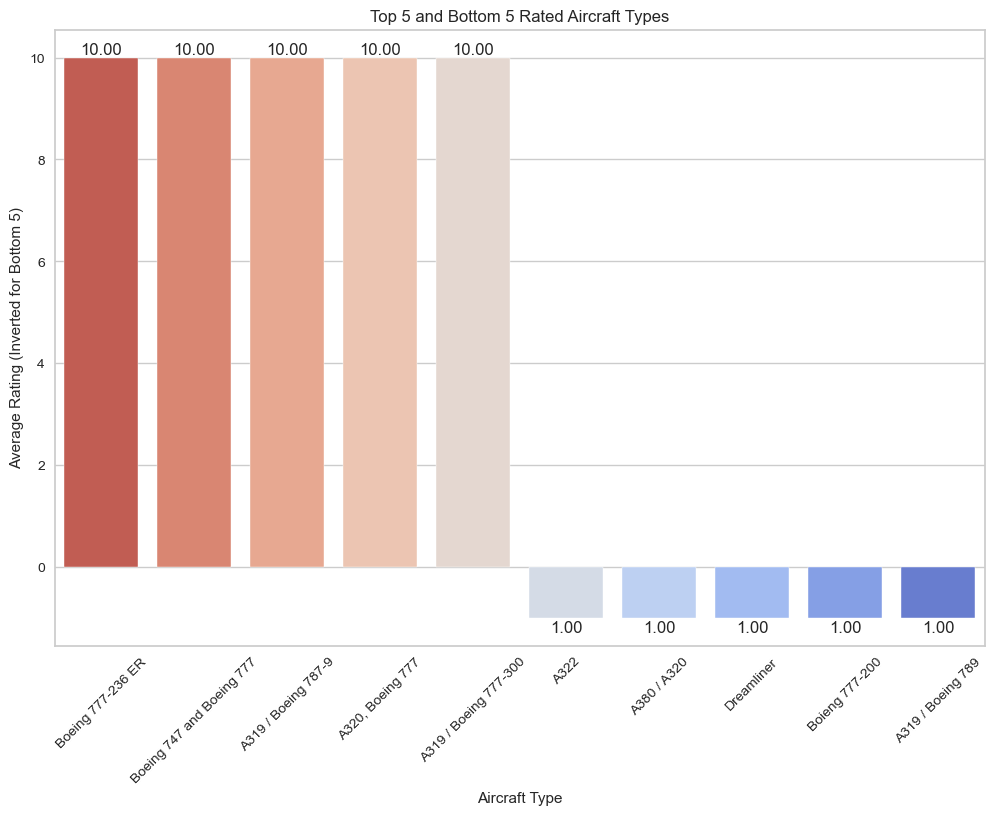

In [30]:
# Creating a horizontal bar plot with flipped axes
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='aircraft', y='rating', data=combined_aircraft, palette='coolwarm_r', orient='v')
plt.title('Top 5 and Bottom 5 Rated Aircraft Types')
plt.ylabel('Average Rating (Inverted for Bottom 5)')
plt.xlabel('Aircraft Type')
plt.xticks(rotation=45)

# Adding value labels
for p in barplot.patches:
    height = p.get_height()  # get bar height
    plt.text(p.get_x() + p.get_width() / 2,  # x position of text
             height if height > 0 else height - 0.05,  # y position of text
             '{:1.2f}'.format(abs(height)),  # bar value
             ha='center', va='bottom' if height > 0 else 'top')
plt.savefig('top_5_and_bottom_5_rated_aircraft_types.png')
plt.show()

In [31]:
import numpy as np

# Counting the number of ratings for each aircraft
ratings_count_per_aircraft = airline_data_cleaned.groupby('aircraft')['rating'].count().reset_index()



In [32]:
ratings_count_per_aircraft

,aircraft,rating
0,767-300,1
1,777,3
2,777-200,1
3,777-300,1
4,777-300 and A320,1
...,...,...
196,SAAB 2000,1
197,Saab 2000,1
198,Unknown,1714
199,Various,1


In [33]:
# Identifying the most and least used aircraft
most_used_aircraft = ratings_count_per_aircraft[ratings_count_per_aircraft['aircraft'] != 'Unknown'].nlargest(1, 'rating')


In [34]:
most_used_aircraft

,aircraft,rating
24,A320,355


In [35]:
least_used_aircraft = ratings_count_per_aircraft[ratings_count_per_aircraft['aircraft'] != 'Unknown'].nsmallest(1, 'rating')



In [36]:
least_used_aircraft

,aircraft,rating
0,767-300,1


In [37]:
airline_data_cleaned.head()

,Unnamed: 0,rating,header,author,date,place,aircraft,traveller_type,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,recommended,entertainment,trip_verified,month_year
0,0,2,service was mediocre at best,Gary Storer,2023-10-03,United Kingdom,A380,Couple Leisure,Economy Class,Chicago to Manchester via Heathrow,2023-10-01,2,3,1,2,2,no,-1,Not Verified,2023-10
1,1,2,BA standards continue to decline,A Jensen,2023-10-02,United Kingdom,A320,Business,Business Class,London Heathrow to Munich,2023-09-01,2,1,2,1,1,no,-1,Verified,2023-10
2,2,2,"won the race to the bottom""",John Rockett,2023-10-02,United Kingdom,A320,Couple Leisure,Business Class,Heathrow to Istanbul,2023-09-01,2,3,2,1,1,no,-1,Not Verified,2023-10
3,3,3,Not a reliable airline,Tatiana Bobrovskaya,2023-10-02,United Kingdom,A320,Business,Economy Class,London to Geneva,2023-10-01,4,4,2,1,1,no,-1,Verified,2023-10
4,4,1,It is a national disgrace,A Dawson,2023-09-30,United Kingdom,Unknown,Couple Leisure,Business Class,Athens to London,2023-09-01,1,1,1,1,1,no,1,Verified,2023-09


In [38]:
most_used_aircraft

,aircraft,rating
24,A320,355


In [39]:
# Calculating the average ratings for the most and least used aircraft
average_ratings_most_used = airline_data_cleaned[airline_data_cleaned['aircraft'].isin(most_used_aircraft['aircraft'])]['rating'].mean()



In [40]:
average_ratings_most_used

4.943661971830986

In [41]:
average_ratings_least_used = airline_data_cleaned[airline_data_cleaned['aircraft'].isin(least_used_aircraft['aircraft'])]['rating'].mean()


In [42]:
average_ratings_least_used

6.0

In [43]:
# Preparing data for the subplot
most_least_used_aircraft_data = pd.DataFrame({
    'Aircraft': ['Most Used', 'Least Used'],
    'Type': [most_used_aircraft['aircraft'].values[0], least_used_aircraft['aircraft'].values[0]],
    'Average Rating': [average_ratings_most_used, average_ratings_least_used]
})

most_least_used_aircraft_data

,Aircraft,Type,Average Rating
0,Most Used,A320,4.943662
1,Least Used,767-300,6.000000


In [44]:
ratings_count_per_aircraft

,aircraft,rating
0,767-300,1
1,777,3
2,777-200,1
3,777-300,1
4,777-300 and A320,1
...,...,...
196,SAAB 2000,1
197,Saab 2000,1
198,Unknown,1714
199,Various,1


In [45]:
# Identifying the 5 most and least used aircraft
top_5_most_used_aircraft = ratings_count_per_aircraft[ratings_count_per_aircraft['aircraft'] != 'Unknown'].nlargest(5, 'rating')


In [46]:
top_5_most_used_aircraft

,aircraft,rating
24,A320,355
137,Boeing 777,270
120,Boeing 747-400,182
73,A380,166
149,Boeing 777-200,125


In [47]:
top_5_least_used_aircraft = ratings_count_per_aircraft[ratings_count_per_aircraft['aircraft'] != 'Unknown'].nsmallest(5, 'rating')


In [48]:
top_5_least_used_aircraft

,aircraft,rating
0,767-300,1
2,777-200,1
3,777-300,1
4,777-300 and A320,1
5,787,1


In [49]:
# Filtering out NaN values from the average ratings calculations
average_ratings_top_5_most = airline_data_cleaned[airline_data_cleaned['aircraft'].isin(top_5_most_used_aircraft['aircraft'])].groupby('aircraft')['rating'].mean().dropna()


In [50]:
average_ratings_top_5_most

aircraft
A320              4.943662
A380              5.596386
Boeing 747-400    5.087912
Boeing 777        4.611111
Boeing 777-200    5.416000
Name: rating, dtype: float64

In [51]:
average_ratings_top_5_least = airline_data_cleaned[airline_data_cleaned['aircraft'].isin(top_5_least_used_aircraft['aircraft'])].groupby('aircraft')['rating'].mean().dropna()



In [52]:
average_ratings_top_5_least

aircraft
767-300             6.0
777-200             1.0
777-300             9.0
777-300 and A320    4.0
787                 3.0
Name: rating, dtype: float64

In [53]:
# Preparing data for the plot, considering only non-NaN values
most_used_aircraft_data = pd.DataFrame({
    'Aircraft': average_ratings_top_5_most.index,
    'Average Rating': average_ratings_top_5_most.values,
    'Usage': 'Most Used'
})
least_used_aircraft_data = pd.DataFrame({
    'Aircraft': average_ratings_top_5_least.index,
    'Average Rating': -average_ratings_top_5_least.values,  # Inverting values for the least used aircraft
    'Usage': 'Least Used'
})


In [54]:
most_used_aircraft_data

,Aircraft,Average Rating,Usage
0,A320,4.943662,Most Used
1,A380,5.596386,Most Used
2,Boeing 747-400,5.087912,Most Used
3,Boeing 777,4.611111,Most Used
4,Boeing 777-200,5.416000,Most Used


In [55]:
least_used_aircraft_data

,Aircraft,Average Rating,Usage
0,767-300,-6.0,Least Used
1,777-200,-1.0,Least Used
2,777-300,-9.0,Least Used
3,777-300 and A320,-4.0,Least Used
4,787,-3.0,Least Used


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

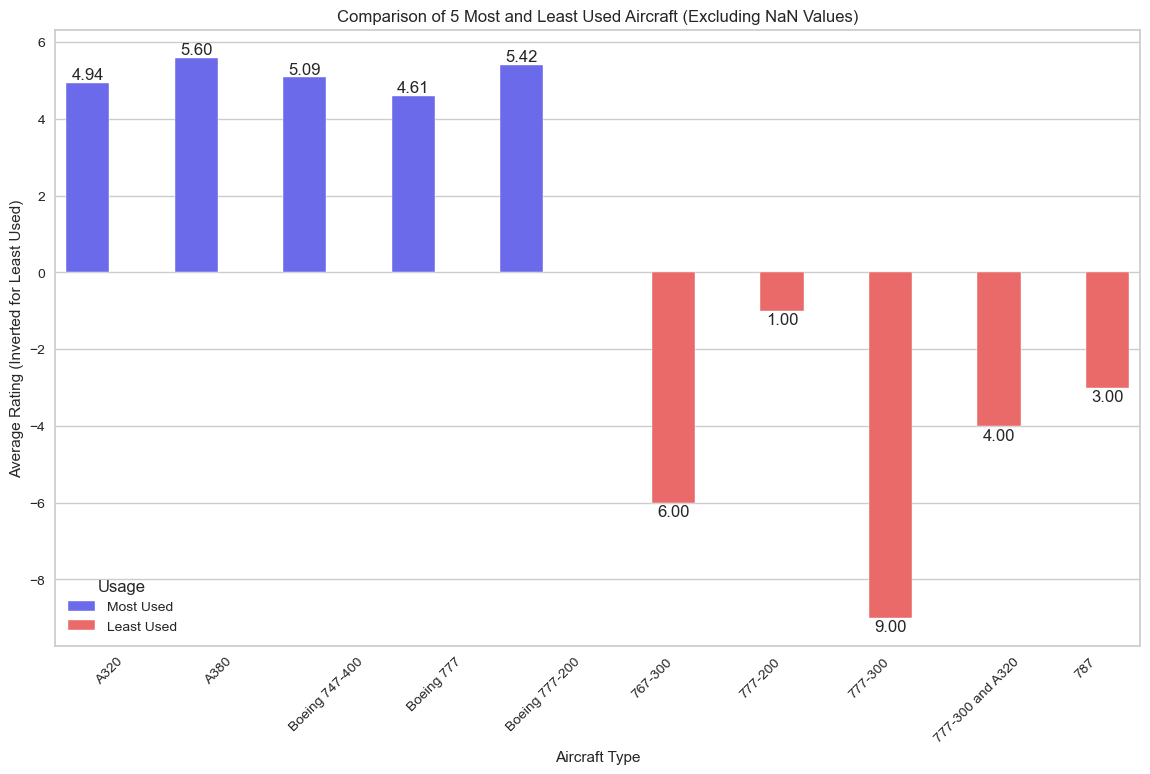

In [56]:
# Combining the data
combined_usage_data = pd.concat([most_used_aircraft_data, least_used_aircraft_data])
# Flipping the plot to horizontal orientation for better clarity
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x='Aircraft', y='Average Rating', hue='Usage', data=combined_usage_data, palette='seismic', orient='v')
plt.title('Comparison of 5 Most and Least Used Aircraft (Excluding NaN Values)')
plt.ylabel('Average Rating (Inverted for Least Used)')
plt.xlabel('Aircraft Type')
plt.xticks(rotation=45)

# Adding value labels
for p in barplot.patches:
    height = p.get_height()  # get bar height
    plt.text(p.get_x() + p.get_width() / 2,  # x position of text
             height if height > 0 else height - 0.05,  # y position of text
             '{:1.2f}'.format(abs(height)),  # bar value
             ha='center', va='bottom' if height > 0 else 'top')
plt.savefig('comparison_of_5_most_and_least_used_aircraft.png')
plt.show()

In [57]:
# Standardizing column names for better readability
airline_data_cleaned.columns = airline_data_cleaned.columns.str.replace('_', ' ').str.title()



In [58]:
airline_data_cleaned

,Unnamed: 0,Rating,Header,Author,Date,Place,Aircraft,Traveller Type,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food Beverages,Ground Service,Value For Money,Recommended,Entertainment,Trip Verified,Month Year
0,0,2,service was mediocre at best,Gary Storer,2023-10-03,United Kingdom,A380,Couple Leisure,Economy Class,Chicago to Manchester via Heathrow,2023-10-01,2,3,1,2,2,no,-1,Not Verified,2023-10
1,1,2,BA standards continue to decline,A Jensen,2023-10-02,United Kingdom,A320,Business,Business Class,London Heathrow to Munich,2023-09-01,2,1,2,1,1,no,-1,Verified,2023-10
2,2,2,"won the race to the bottom""",John Rockett,2023-10-02,United Kingdom,A320,Couple Leisure,Business Class,Heathrow to Istanbul,2023-09-01,2,3,2,1,1,no,-1,Not Verified,2023-10
3,3,3,Not a reliable airline,Tatiana Bobrovskaya,2023-10-02,United Kingdom,A320,Business,Economy Class,London to Geneva,2023-10-01,4,4,2,1,1,no,-1,Verified,2023-10
4,4,1,It is a national disgrace,A Dawson,2023-09-30,United Kingdom,Unknown,Couple Leisure,Business Class,Athens to London,2023-09-01,1,1,1,1,1,no,1,Verified,2023-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3611,3649,2,British Airways customer review,G Pardoe,2014-05-03,United Kingdom,Unknown,Unknown,Economy Class,Unknown,NaT,5,5,5,-1,4,yes,-1,Unknown,2014-05
3612,3650,8,British Airways customer review,Guy Senior,2014-04-30,United Kingdom,Unknown,Unknown,Economy Class,Unknown,NaT,3,3,3,-1,3,no,4,Unknown,2014-04
3613,3651,8,British Airways customer review,Jack Hughes,2012-08-30,United Kingdom,Unknown,Unknown,Business Class,Unknown,NaT,4,3,2,-1,2,no,3,Unknown,2012-08
3614,3652,6,British Airways customer review,W Benson,2012-08-29,United Kingdom,Unknown,Unknown,Economy Class,Unknown,NaT,3,1,2,-1,3,no,-1,Unknown,2012-08


In [59]:
# Updating the column names in our prepared data for the subplot
most_least_used_aircraft_data.columns = ['Aircraft Usage', 'Type', 'Average Rating']


In [60]:
most_least_used_aircraft_data

,Aircraft Usage,Type,Average Rating
0,Most Used,A320,4.943662
1,Least Used,767-300,6.000000


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

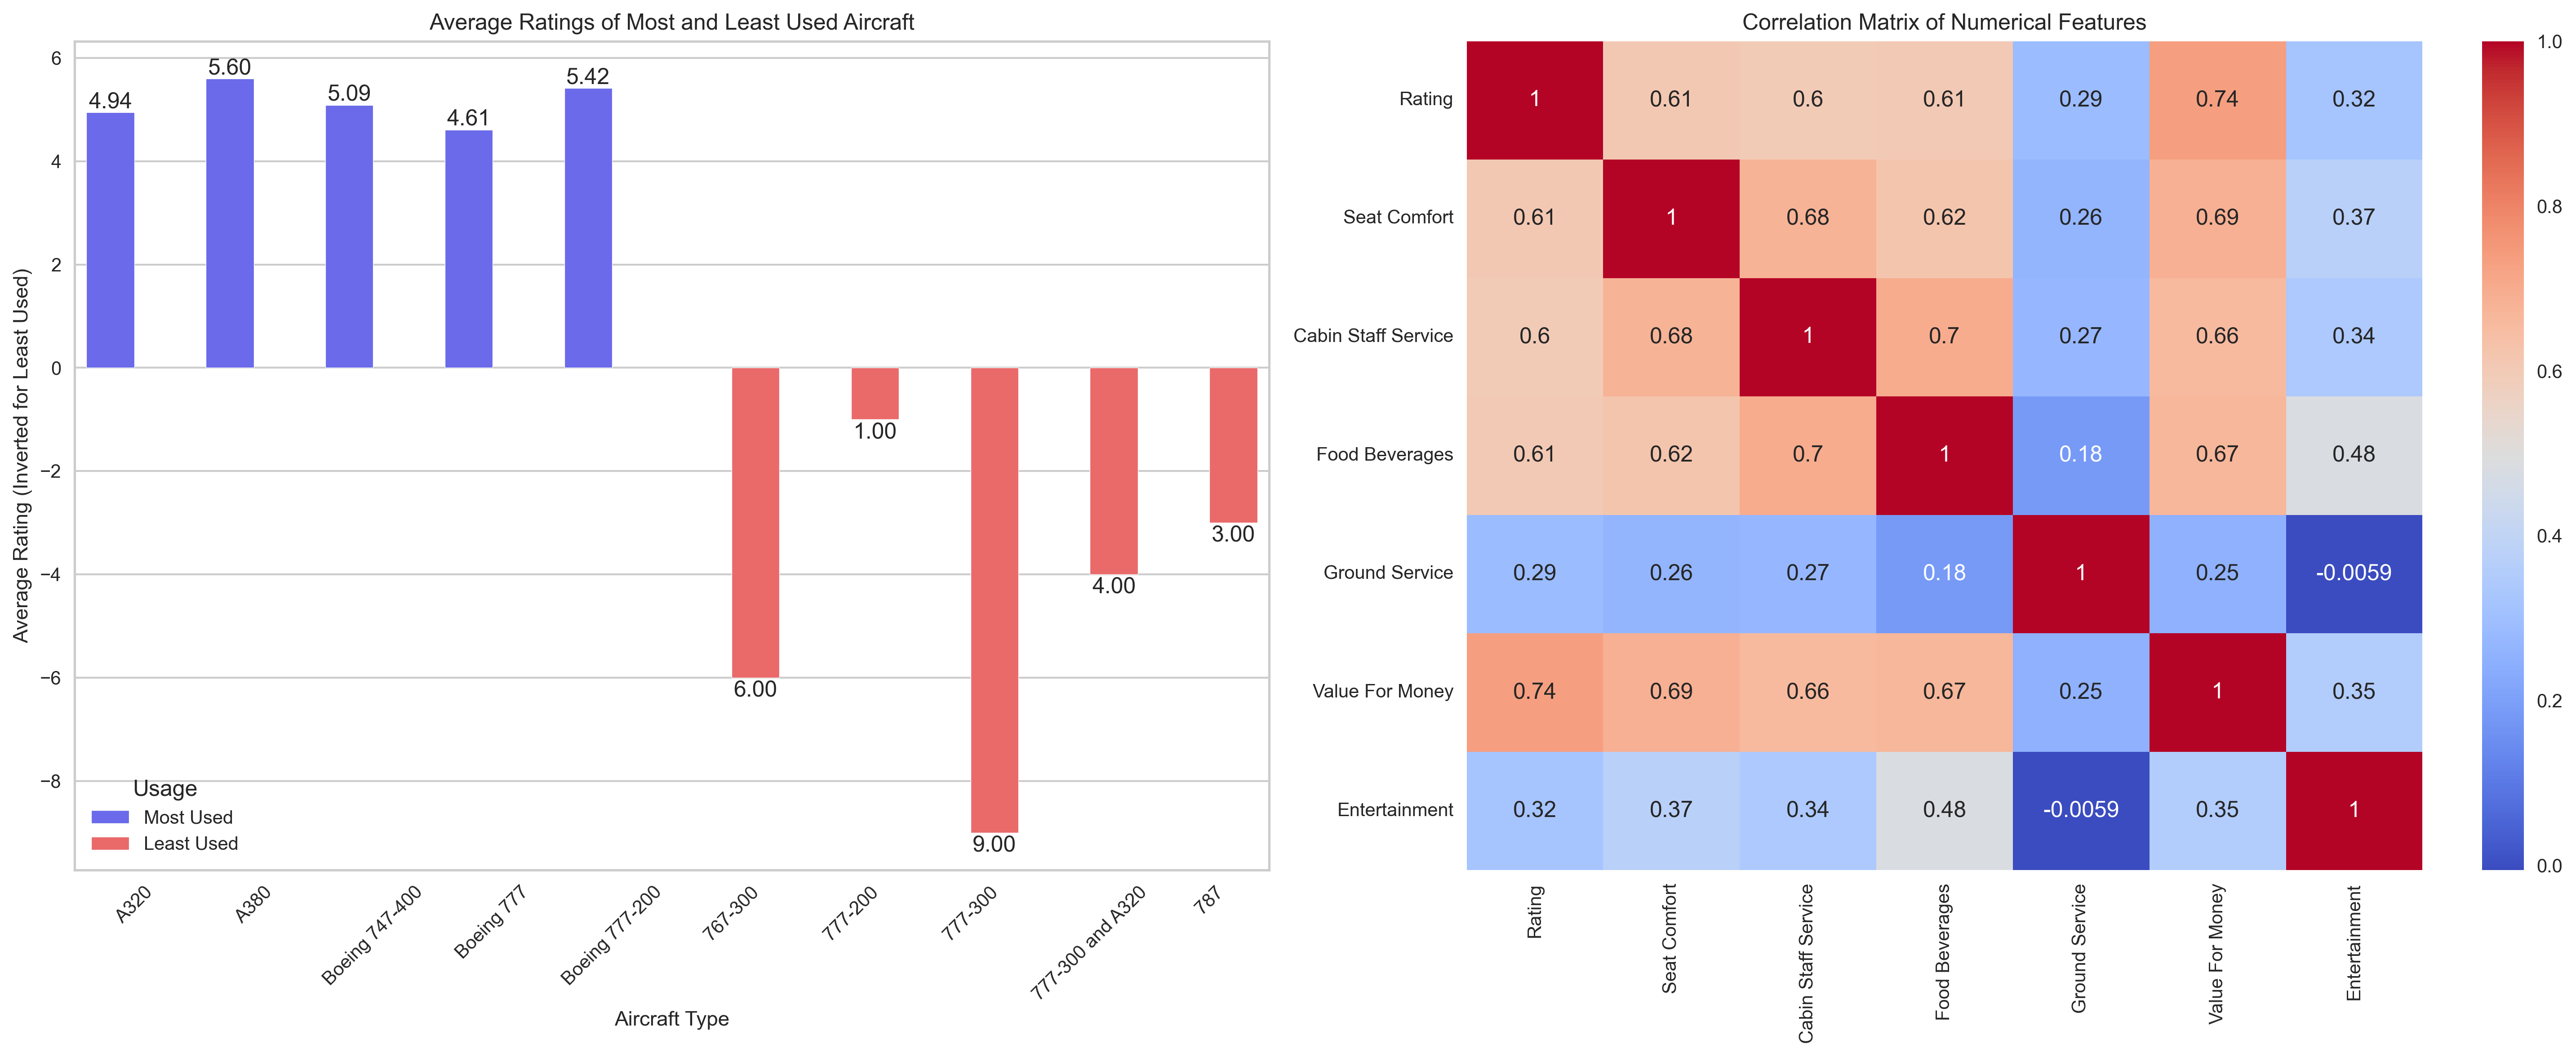

In [61]:
combined_usage_data.columns = ['Aircraft Type', 'Average Rating', 'Usage']

# Generating the subplot
fig, ax = plt.subplots(1, 2, figsize=(20, 8), dpi=300)

# Bar plot for the most and least used aircraft
sns.barplot(x='Aircraft Type', y='Average Rating', hue='Usage', data=combined_usage_data, palette='seismic', ax=ax[0], orient='v')
ax[0].set_title('Average Ratings of Most and Least Used Aircraft')
ax[0].set_ylabel('Average Rating (Inverted for Least Used)')
ax[0].set_xlabel('Aircraft Type')
ax[0].tick_params(axis='x', rotation=45)

# Adding value labels to the bar plot
for p in ax[0].patches:
    height = p.get_height()  # get bar height
    ax[0].text(p.get_x() + p.get_width() / 2,  # x position of text
               height if height > 0 else height - 0.05,  # y position of text
               '{:1.2f}'.format(abs(height)),  # bar value
               ha='center', va='bottom' if height > 0 else 'top')

# Correlation Matrix and Heatmap
numerical_data = airline_data_cleaned[['Rating', 'Seat Comfort', 'Cabin Staff Service', 'Food Beverages', 'Ground Service', 'Value For Money', 'Entertainment']]
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax[1])
ax[1].set_title('Correlation Matrix of Numerical Features')

plt.tight_layout()
plt.savefig('correlation_matrix_and_heatmap.png')
plt.show()

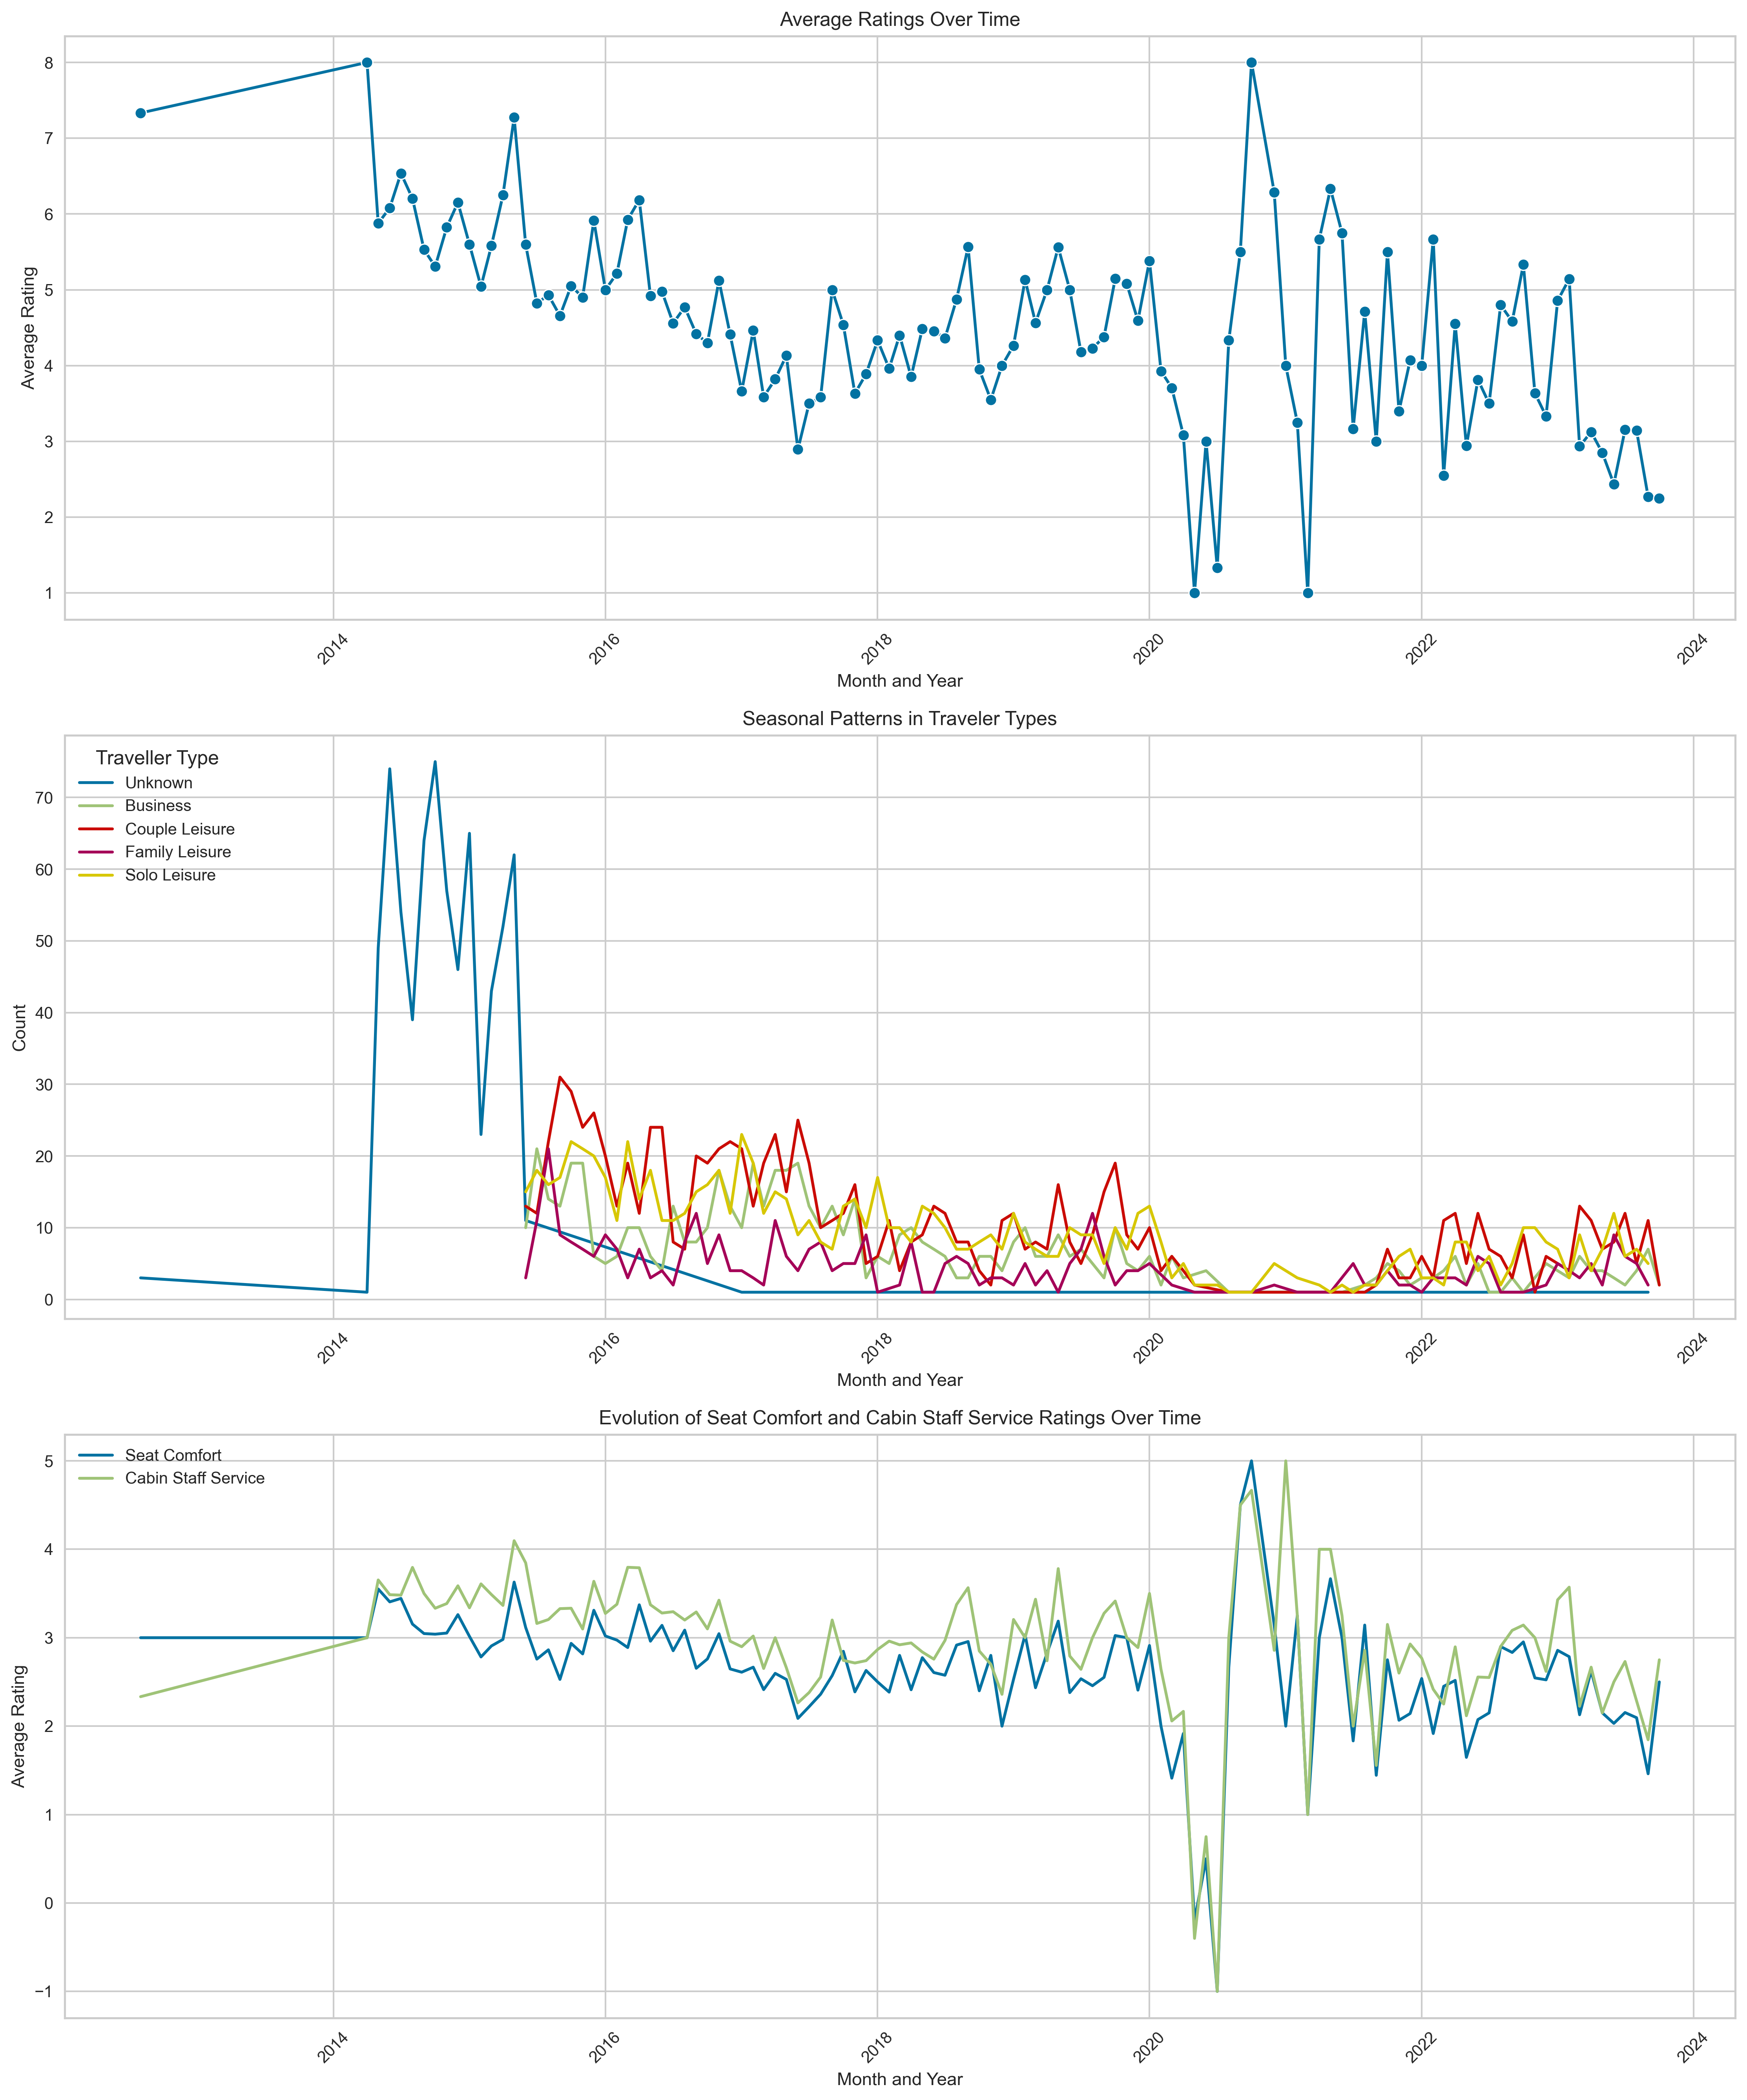

In [62]:
# Visualization 1: Trends in Overall Ratings Over Time
# We already calculated this earlier, so let's just plot it again
average_ratings_over_time = airline_data_cleaned.groupby('Month Year')['Rating'].mean().reset_index()
average_ratings_over_time['Month Year'] = average_ratings_over_time['Month Year'].dt.to_timestamp()

# Visualization 2: Seasonal Patterns in Traveler Types
# Counting the occurrences of each traveler type per month
traveler_types_over_time = airline_data_cleaned.groupby(['Month Year', 'Traveller Type']).size().reset_index(name='Count')
traveler_types_over_time['Month Year'] = traveler_types_over_time['Month Year'].dt.to_timestamp()

# Visualization 3: Evolution of Specific Ratings Over Time
# Calculating average seat comfort and cabin staff service ratings over time
average_seat_cabin_ratings_over_time = airline_data_cleaned.groupby('Month Year')[['Seat Comfort', 'Cabin Staff Service']].mean().reset_index()
average_seat_cabin_ratings_over_time['Month Year'] = average_seat_cabin_ratings_over_time['Month Year'].dt.to_timestamp()

# Creating subplots
fig, ax = plt.subplots(3, 1, figsize=(15, 18), dpi=300)

# Plot 1: Trends in Overall Ratings Over Time
sns.lineplot(x='Month Year', y='Rating', data=average_ratings_over_time, marker='o', color='b', ax=ax[0])
ax[0].set_title('Average Ratings Over Time')
ax[0].set_xlabel('Month and Year')
ax[0].set_ylabel('Average Rating')
ax[0].tick_params(axis='x', rotation=45)

# Plot 2: Seasonal Patterns in Traveler Types
sns.lineplot(x='Month Year', y='Count', hue='Traveller Type', data=traveler_types_over_time, ax=ax[1])
ax[1].set_title('Seasonal Patterns in Traveler Types')
ax[1].set_xlabel('Month and Year')
ax[1].set_ylabel('Count')
ax[1].tick_params(axis='x', rotation=45)
ax[1].legend(title='Traveller Type', loc='upper left')

# Plot 3: Evolution of Specific Ratings Over Time
sns.lineplot(x='Month Year', y='Seat Comfort', data=average_seat_cabin_ratings_over_time, ax=ax[2], label='Seat Comfort')
sns.lineplot(x='Month Year', y='Cabin Staff Service', data=average_seat_cabin_ratings_over_time, ax=ax[2], label='Cabin Staff Service')
ax[2].set_title('Evolution of Seat Comfort and Cabin Staff Service Ratings Over Time')
ax[2].set_xlabel('Month and Year')
ax[2].set_ylabel('Average Rating')
ax[2].tick_params(axis='x', rotation=45)
ax[2].legend(loc='upper left')

plt.tight_layout()
plt.savefig('temporal_subplots.png')
plt.show()

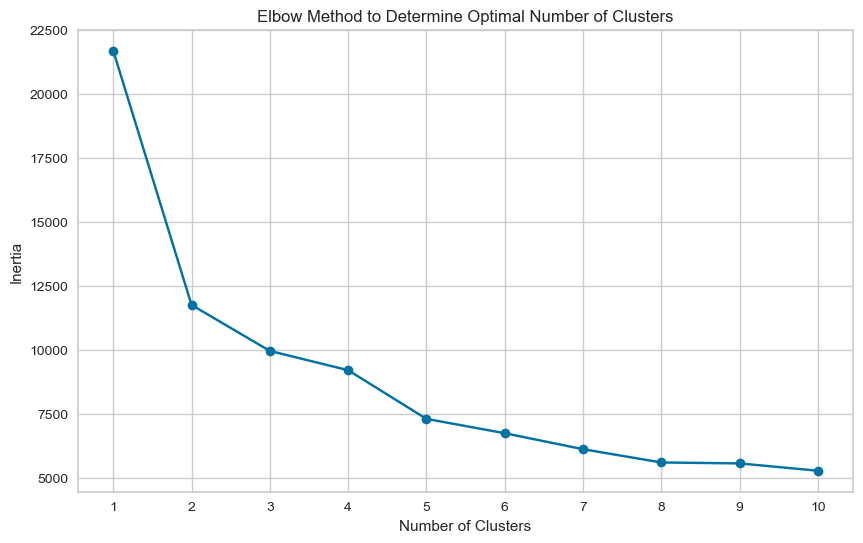

In [63]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np

# Selecting relevant features for clustering
features_for_clustering = airline_data_cleaned[['Rating', 'Seat Comfort', 'Cabin Staff Service', 'Food Beverages', 'Ground Service', 'Value For Money']]

# Standardizing the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Determining the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.savefig('elbow_method.png')
plt.show()

In [64]:
# Applying K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Adding the cluster labels to the dataset for analysis
airline_data_cleaned['Cluster'] = clusters



In [65]:
airline_data_cleaned

,Unnamed: 0,Rating,Header,Author,Date,Place,Aircraft,Traveller Type,Seat Type,Route,...,Seat Comfort,Cabin Staff Service,Food Beverages,Ground Service,Value For Money,Recommended,Entertainment,Trip Verified,Month Year,Cluster
0,0,2,service was mediocre at best,Gary Storer,2023-10-03,United Kingdom,A380,Couple Leisure,Economy Class,Chicago to Manchester via Heathrow,...,2,3,1,2,2,no,-1,Not Verified,2023-10,0
1,1,2,BA standards continue to decline,A Jensen,2023-10-02,United Kingdom,A320,Business,Business Class,London Heathrow to Munich,...,2,1,2,1,1,no,-1,Verified,2023-10,1
2,2,2,"won the race to the bottom""",John Rockett,2023-10-02,United Kingdom,A320,Couple Leisure,Business Class,Heathrow to Istanbul,...,2,3,2,1,1,no,-1,Not Verified,2023-10,0
3,3,3,Not a reliable airline,Tatiana Bobrovskaya,2023-10-02,United Kingdom,A320,Business,Economy Class,London to Geneva,...,4,4,2,1,1,no,-1,Verified,2023-10,0
4,4,1,It is a national disgrace,A Dawson,2023-09-30,United Kingdom,Unknown,Couple Leisure,Business Class,Athens to London,...,1,1,1,1,1,no,1,Verified,2023-09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3611,3649,2,British Airways customer review,G Pardoe,2014-05-03,United Kingdom,Unknown,Unknown,Economy Class,Unknown,...,5,5,5,-1,4,yes,-1,Unknown,2014-05,2
3612,3650,8,British Airways customer review,Guy Senior,2014-04-30,United Kingdom,Unknown,Unknown,Economy Class,Unknown,...,3,3,3,-1,3,no,4,Unknown,2014-04,0
3613,3651,8,British Airways customer review,Jack Hughes,2012-08-30,United Kingdom,Unknown,Unknown,Business Class,Unknown,...,4,3,2,-1,2,no,3,Unknown,2012-08,0
3614,3652,6,British Airways customer review,W Benson,2012-08-29,United Kingdom,Unknown,Unknown,Economy Class,Unknown,...,3,1,2,-1,3,no,-1,Unknown,2012-08,0


In [66]:
# Checking the distribution of data points in each cluster
cluster_distribution = airline_data_cleaned['Cluster'].value_counts().reset_index()
cluster_distribution.columns = ['Cluster', 'Count']

cluster_distribution

,Cluster,Count
0,0,1310
1,2,1289
2,1,1017
